This project is related to housing prices in Boston (USA). The dataset itself is taking from sklearn library and is available for everyone to use. The prediction of housing prices can take any continuous value and therefore the method chosen for this project will be regression in a supervised machine learning approach. 

## Import libraries for the project

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Import dataset & pre-processing

In [2]:
#Let's import them housing prices dataset from sklearn database
#It's difficult to make sense of the data in this form
#Let's do some processing
housing_price_data = sklearn.datasets.load_boston()
housing_price_data

/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
#Using pandas we transformed to raw data into a structure table
#Features names gives the names of all columns
#still there is one column missing (output column => price)
hp_df = pd.DataFrame(housing_price_data.data, columns= housing_price_data.feature_names)
hp_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#The colum which was called target in the raw data was assigned the name 'Price' in the new dataframe
hp_df['Price'] = housing_price_data.target
hp_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#506 rows and 14 columns
hp_df.shape

(506, 14)

In [6]:
#statistical data of the dataframe
#We have no missing values
hp_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#split the data into dependent variables (features) and independent variable (output or price)
X = hp_df.drop('Price', axis=1)
Y = hp_df['Price']

In [8]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

<AxesSubplot:>

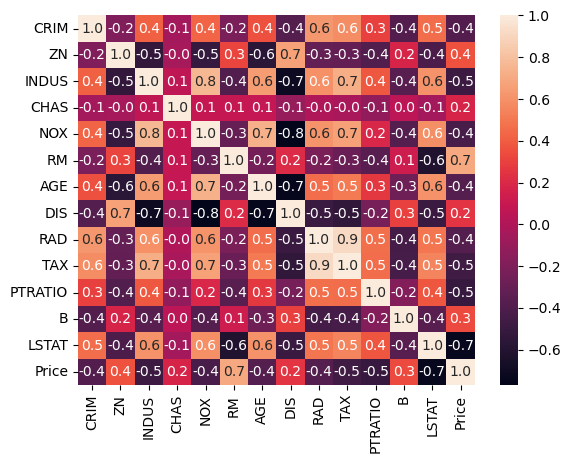

In [9]:
#Find the correlation between the features
correl = hp_df.corr()
sns.heatmap(correl, cbar=True, fmt='.1f', annot=True, cmap='rocket')

## Split train/test data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=4)
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (354, 13) (152, 13)


## Model training and ML model

In [11]:
#XGBoost is a complex ML model based on multiple decision trees
#It is used for a wide range of ML projects
#For this purpose we're using the XGBRegressor because it's a regression model
model = XGBRegressor()

In [12]:
#Training model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
training_prediction = model.predict(X_train)
training_prediction

array([23.898668 , 18.202156 , 21.698345 , 13.493743 , 49.992077 ,
       23.10208  , 48.794533 , 13.817799 , 20.102333 , 50.00149  ,
       34.924053 ,  8.39999  , 15.187474 , 22.976278 , 24.694382 ,
       25.28971  , 17.211199 , 50.002148 , 22.878271 , 20.199478 ,
       17.412027 , 19.499348 , 18.501293 , 14.001987 , 22.610323 ,
       14.109741 , 15.607283 , 46.006325 , 20.496004 , 13.502242 ,
       10.402703 , 21.431185 , 21.598164 , 23.185183 , 23.025291 ,
       17.60395  , 16.11072  ,  5.00106  ,  8.298136 , 27.49878  ,
       18.691305 , 21.697563 , 30.692205 ,  5.008037 , 11.308817 ,
        7.000945 , 32.904667 , 14.601417 , 11.990232 , 28.090174 ,
       17.998945 ,  5.5982914, 23.606403 , 24.698915 , 22.4925   ,
       17.7013   , 13.096569 , 23.114618 , 25.0129   , 14.903409 ,
        9.713751 , 22.810575 , 22.009037 , 23.61215  , 14.306128 ,
       18.795181 , 19.897982 , 13.618455 , 19.405636 , 16.81838  ,
       20.00098  , 43.11957  , 27.88593  , 20.115192 , 18.9814

In [14]:
#since we have a regression problem we should calculate the R2 error and mean absolute error
#We can see that the models trains perfectly
r2 = metrics.r2_score(Y_train, training_prediction)
MAE = metrics.mean_absolute_error(Y_train, training_prediction)

print("R squares error: ", r2)
print("Mean absolute error: ", MAE)

R squares error:  0.9999980912185324
Mean absolute error:  0.008653184923075066


In [15]:
#R squared is very close to 1 and it means that the training model is nearly perfect

In [16]:
#Testing model
test_prediction = model.predict(X_test)

In [17]:
#85% R square accuracy which is good for this model
test_r2 = metrics.r2_score(Y_test, test_prediction)
test_MAE = metrics.mean_absolute_error(Y_test, test_prediction)

print("R squares error: ", test_r2)
print("Mean absolute error: ", test_MAE)

R squares error:  0.8579951986672496
Mean absolute error:  2.5309582503218397
